When starting to process the GPS data we face the following issue:
- On one side, we have the video + `.fit` file. Their name do not match, but the length (time) does so we can align them.
- On the other hand, we have the U-blx + D-GPS data, which are aligned. Here time is UTC, in tenths of seconds.

```
    ┌───────┐       ┌───────┐               ┌───────┐       ┌───────┐
    │       │   √   │       │       ?       │       │   √   │       │
    │ video │  <=>  │ .fit  │    <= X =>    │ D-GPS │  <=>  │ U-blx │
    │       │       │       │               │       │       │       │
    └───────┘       └───────┘               └───────┘       └───────┘
```

So how can we match the D-GPS data with the video frames?  
This is what we do in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os, time
sys.path.append('../scripts/')
import fit2csv

# Correspondance video vs `.fit`

## Convert `.fit` to `.csv`

The following `.fit` files correspond to the Tesla:

In [10]:
!ls -lah "../data/raw/day 4/GMetrix/"

total 49M
drwxr-sr-x 2 jovyan users 4.0K Jul 22 22:25 .
drwxr-sr-x 5 jovyan users 4.0K Jul 22 22:24 ..
-rw-r--r-- 1 jovyan users  22M Jul 22 15:46 2019-07-04-13-04-32.fit
-rw-r--r-- 1 jovyan users 6.2M Jul 22 15:46 2019-07-04-14-15-08.fit
-rw-r--r-- 1 jovyan users 6.4M Jul 22 15:46 2019-07-04-14-50-23.fit
-rw-r--r-- 1 jovyan users 6.2M Jul 22 15:46 2019-07-04-15-13-46.fit
-rw-r--r-- 1 jovyan users 754K Jul 22 15:46 2019-07-04-15-30-59.fit
-rw-r--r-- 1 jovyan users 7.3M Jul 22 15:46 2019-07-04-15-34-19.fit
-rw-r--r-- 1 jovyan users 2.0K Jul 22 15:46 2019-07-04-20-55-34.fit
-rw-r--r-- 1 jovyan users 1.6K Jul 22 15:46 2019-07-04-20-56-48.fit
-rw-r--r-- 1 jovyan users 2.0K Jul 22 15:46 2019-07-04-20-58-39.fit
-rw-r--r-- 1 jovyan users  29K Jul 22 15:46 2019-07-04-20-58-48.fit


And these correspond to the Mercedes:

In [11]:
!ls -lah "../data/raw/day 4 b/GMetrix/"

total 53M
drwxr-sr-x 2 jovyan users 4.0K Jul 23 04:42 .
drwxr-sr-x 5 jovyan users 4.0K Jul 23 04:41 ..
-rw-r--r-- 1 jovyan users 3.4K Jul 22 15:58 2019-07-04-07-39-38.fit
-rw-r--r-- 1 jovyan users  79K Jul 22 15:58 2019-07-04-13-00-41.fit
-rw-r--r-- 1 jovyan users  25K Jul 22 15:58 2019-07-04-13-01-37.fit
-rw-r--r-- 1 jovyan users  15M Jul 22 15:58 2019-07-04-13-08-00.fit
-rw-r--r-- 1 jovyan users 8.7M Jul 22 15:58 2019-07-04-13-44-50.fit
-rw-r--r-- 1 jovyan users 6.3M Jul 22 15:58 2019-07-04-14-15-16.fit
-rw-r--r-- 1 jovyan users 6.2M Jul 22 15:58 2019-07-04-14-50-58.fit
-rw-r--r-- 1 jovyan users 6.5M Jul 22 15:58 2019-07-04-15-14-33.fit
-rw-r--r-- 1 jovyan users 8.0M Jul 22 15:58 2019-07-04-15-34-58.fit
-rw-r--r-- 1 jovyan users 3.1M Jul 22 15:58 2019-07-04-15-58-49.fit
-rw-r--r-- 1 jovyan users 2.0K Jul 22 15:58 2019-07-04-21-24-13.fit


Convert the Tesla ones:

In [7]:
fit2csv.parse_fitfiles(path='../data/raw/day 4/GMetrix/', outpath='../data/tmp/tesla/')

Converting 2019-07-04-15-13-46.fit...
Wrote ../data/tmp/tesla/2019-07-04-15-13-46.csv
Converting 2019-07-04-20-58-48.fit...
Wrote ../data/tmp/tesla/2019-07-04-20-58-48.csv
Converting 2019-07-04-20-55-34.fit...
Wrote ../data/tmp/tesla/2019-07-04-20-55-34.csv
Converting 2019-07-04-14-50-23.fit...
Wrote ../data/tmp/tesla/2019-07-04-14-50-23.csv
Converting 2019-07-04-13-04-32.fit...
Wrote ../data/tmp/tesla/2019-07-04-13-04-32.csv
Converting 2019-07-04-20-58-39.fit...
Wrote ../data/tmp/tesla/2019-07-04-20-58-39.csv
Converting 2019-07-04-20-56-48.fit...
Wrote ../data/tmp/tesla/2019-07-04-20-56-48.csv
Converting 2019-07-04-14-15-08.fit...
Wrote ../data/tmp/tesla/2019-07-04-14-15-08.csv
Converting 2019-07-04-15-30-59.fit...
Wrote ../data/tmp/tesla/2019-07-04-15-30-59.csv
Converting 2019-07-04-15-34-19.fit...
Wrote ../data/tmp/tesla/2019-07-04-15-34-19.csv
Finished conversions!


And the for the Mercedes:

In [16]:
fit2csv.parse_fitfiles(path='../data/raw/day 4 b/GMetrix/', outpath='../data/tmp/mercedes/')

Converting 2019-07-04-13-44-50.fit...
Wrote ../data/tmp/mercedes/2019-07-04-13-44-50.csv
Converting 2019-07-04-14-50-58.fit...
Wrote ../data/tmp/mercedes/2019-07-04-14-50-58.csv
Converting 2019-07-04-13-00-41.fit...
Wrote ../data/tmp/mercedes/2019-07-04-13-00-41.csv
Converting 2019-07-04-15-34-58.fit...
Wrote ../data/tmp/mercedes/2019-07-04-15-34-58.csv
Converting 2019-07-04-15-58-49.fit...
Wrote ../data/tmp/mercedes/2019-07-04-15-58-49.csv
Converting 2019-07-04-13-08-00.fit...
Wrote ../data/tmp/mercedes/2019-07-04-13-08-00.csv
Converting 2019-07-04-21-24-13.fit...
Wrote ../data/tmp/mercedes/2019-07-04-21-24-13.csv
Converting 2019-07-04-13-01-37.fit...
Wrote ../data/tmp/mercedes/2019-07-04-13-01-37.csv
Converting 2019-07-04-07-39-38.fit...
Wrote ../data/tmp/mercedes/2019-07-04-07-39-38.csv
Converting 2019-07-04-15-14-33.fit...
Wrote ../data/tmp/mercedes/2019-07-04-15-14-33.csv
Converting 2019-07-04-14-15-16.fit...
Wrote ../data/tmp/mercedes/2019-07-04-14-15-16.csv
Finished conversions!

## Tesla `.fit` vs videos

Lets explore some data of the Tesla files:

In [167]:
path = '../data/tmp/tesla/'
files = os.listdir(path)
csv_files = [file for file in files if file[-4:].lower() == '.csv']
for file in csv_files:
    tmp = pd.read_csv(path + file)
    display(tmp.head())
    print(file, '-> shape =', tmp.shape, '\nFrom', tmp.utc_timestamp.min(), 'to', tmp.utc_timestamp.max())
    print('Length is {}'.format(time.strftime('%H:%M:%S', time.gmtime(tmp.utc_timestamp.nunique()))))
    print('------------------------------------------------------------')

,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 11:04:33+00:00,68,57.777415,12.779599,186.2,0.0,"(0.0, 0.0, 0.0)"
1,2019-07-04 11:04:33+00:00,168,57.777415,12.779600,186.2,0.0,"(-0.01, 0.0, 0.0)"
2,2019-07-04 11:04:33+00:00,268,57.777414,12.779601,186.2,0.0,"(-0.01, 0.0, 0.0)"
3,2019-07-04 11:04:33+00:00,368,57.777414,12.779602,186.2,0.0,"(-0.01, 0.0, 0.0)"
4,2019-07-04 11:04:33+00:00,468,57.777414,12.779602,186.0,0.0,"(-0.01, 0.0, 0.0)"


2019-07-04-13-04-32.csv -> shape = (40328, 7) 
From 2019-07-04 11:04:33+00:00 to 2019-07-04 12:11:46+00:00
Length is 01:07:14
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 18:58:59+00:00,720,57.719381,12.936852,185.6,4.6332,"(0.19, 1.27, 0.72)"
1,2019-07-04 18:58:59+00:00,820,57.719382,12.936848,185.4,4.6116,"(0.17, 1.26, 0.67)"
2,2019-07-04 18:58:59+00:00,920,57.719384,12.936844,185.2,4.5900,"(0.16, 1.26, 0.63)"
3,2019-07-04 18:58:59+00:00,20,57.719385,12.936841,185.2,4.5612,"(0.15, 1.25, 0.6)"
4,2019-07-04 18:58:59+00:00,120,57.719386,12.936838,185.2,4.5108,"(0.15, 1.24, 0.57)"


2019-07-04-20-58-48.csv -> shape = (397, 7) 
From 2019-07-04 18:58:59+00:00 to 2019-07-04 18:59:38+00:00
Length is 00:00:40
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 12:15:14+00:00,838,57.779327,12.777346,192.6,0.0,"(-0.49, 0.12, -0.24)"
1,2019-07-04 12:15:14+00:00,938,57.779326,12.777343,192.6,0.0,"(-0.47, 0.08, -0.24)"
2,2019-07-04 12:15:14+00:00,38,57.779295,12.777384,192.6,0.0,"(-0.46, 0.03, -0.24)"
3,2019-07-04 12:15:14+00:00,138,57.779276,12.777406,192.6,0.0,"(-0.44, 0.0, -0.24)"
4,2019-07-04 12:15:14+00:00,238,57.779266,12.777424,192.6,0.0,"(-0.41, 0.0, -0.24)"


2019-07-04-14-15-08.csv -> shape = (9456, 7) 
From 2019-07-04 12:15:14+00:00 to 2019-07-04 12:30:59+00:00
Length is 00:15:46
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity


2019-07-04-20-55-34.csv -> shape = (0, 7) 
From nan to nan
Length is 00:00:00
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 13:34:25+00:00,313,57.779725,12.777191,179.0,0.0,"(-0.05, -0.13, -0.03)"
1,2019-07-04 13:34:25+00:00,413,57.779726,12.777189,179.0,0.0,"(-0.03, -0.09, -0.02)"
2,2019-07-04 13:34:25+00:00,513,57.779726,12.777186,179.0,0.0,"(-0.02, -0.05, -0.02)"
3,2019-07-04 13:34:25+00:00,613,57.779725,12.777182,179.0,0.0,"(-0.01, -0.04, -0.02)"
4,2019-07-04 13:34:25+00:00,713,57.779723,12.777179,179.0,0.0,"(-0.01, -0.04, -0.02)"


2019-07-04-15-34-19.csv -> shape = (11161, 7) 
From 2019-07-04 13:34:25+00:00 to 2019-07-04 13:53:01+00:00
Length is 00:18:37
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity


2019-07-04-20-58-39.csv -> shape = (0, 7) 
From nan to nan
Length is 00:00:00
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 12:50:29+00:00,704,57.779120,12.777411,182.6,24.8544,"(6.31, 2.8, -0.06)"
1,2019-07-04 12:50:29+00:00,804,57.779129,12.777409,181.2,24.0372,"(6.08, 2.75, -0.06)"
2,2019-07-04 12:50:29+00:00,904,57.779136,12.777412,179.8,23.6556,"(5.96, 2.75, -0.07)"
3,2019-07-04 12:50:29+00:00,4,57.779133,12.777366,179.2,23.5764,"(5.85, 2.93, -0.07)"
4,2019-07-04 12:50:29+00:00,104,57.779138,12.777368,178.4,23.2776,"(5.68, 3.08, -0.07)"


2019-07-04-14-50-23.csv -> shape = (9737, 7) 
From 2019-07-04 12:50:29+00:00 to 2019-07-04 13:06:42+00:00
Length is 00:16:14
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 13:31:04+00:00,673,57.779793,12.777120,179.0,7.8876,"(-0.68, 2.08, 0.45)"
1,2019-07-04 13:31:04+00:00,773,57.779795,12.777114,179.2,7.6104,"(-0.65, 2.01, 0.45)"
2,2019-07-04 13:31:04+00:00,873,57.779798,12.777109,179.2,7.3764,"(-0.62, 1.95, 0.45)"
3,2019-07-04 13:31:04+00:00,973,57.779800,12.777107,179.2,7.1100,"(-0.59, 1.88, 0.45)"
4,2019-07-04 13:31:04+00:00,73,57.779802,12.777104,179.2,6.8184,"(-0.55, 1.81, 0.45)"


2019-07-04-15-30-59.csv -> shape = (1097, 7) 
From 2019-07-04 13:31:04+00:00 to 2019-07-04 13:32:53+00:00
Length is 00:01:50
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 13:13:53+00:00,46,57.778952,12.777477,172.0,0.0,"(0.05, 0.07, 0.0)"
1,2019-07-04 13:13:53+00:00,146,57.778953,12.777477,172.0,0.0,"(0.05, 0.07, 0.0)"
2,2019-07-04 13:13:53+00:00,246,57.778953,12.777473,172.6,0.0,"(0.04, 0.06, 0.0)"
3,2019-07-04 13:13:53+00:00,346,57.778953,12.777472,173.0,0.0,"(0.04, 0.05, 0.0)"
4,2019-07-04 13:13:53+00:00,446,57.778956,12.777474,173.2,0.0,"(0.05, 0.06, 0.0)"


2019-07-04-15-13-46.csv -> shape = (9344, 7) 
From 2019-07-04 13:13:53+00:00 to 2019-07-04 13:29:27+00:00
Length is 00:15:35
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 18:56:49+00:00,939,57.719451,12.936811,190.8,0.0,"(0.0, 0.0, 0.0)"
1,2019-07-04 18:56:49+00:00,39,57.719450,12.936811,190.6,0.0,"(0.0, 0.0, 0.0)"
2,2019-07-04 18:56:49+00:00,139,57.719450,12.936810,190.6,0.0,"(0.0, 0.0, 0.0)"
3,2019-07-04 18:56:49+00:00,239,57.719450,12.936810,190.4,0.0,"(0.0, 0.0, 0.0)"
4,2019-07-04 18:56:49+00:00,339,57.719450,12.936809,190.4,0.0,"(0.0, 0.0, 0.0)"


2019-07-04-20-56-48.csv -> shape = (9, 7) 
From 2019-07-04 18:56:49+00:00 to 2019-07-04 18:56:49+00:00
Length is 00:00:01
------------------------------------------------------------


The available videos are:

In [35]:
!ls ../data/raw/day\ 4/DCIM/100_VIRB/*.GLV

'../data/raw/day 4/DCIM/100_VIRB/V0340034.GLV'
'../data/raw/day 4/DCIM/100_VIRB/V0350035.GLV'
'../data/raw/day 4/DCIM/100_VIRB/V0350036.GLV'
'../data/raw/day 4/DCIM/100_VIRB/V0360037.GLV'
'../data/raw/day 4/DCIM/100_VIRB/V0370038.GLV'
'../data/raw/day 4/DCIM/100_VIRB/V0380039.GLV'
'../data/raw/day 4/DCIM/100_VIRB/V0390040.GLV'
'../data/raw/day 4/DCIM/100_VIRB/V0400041.GLV'
'../data/raw/day 4/DCIM/100_VIRB/V0410042.GLV'
'../data/raw/day 4/DCIM/100_VIRB/V0420043.GLV'


In [36]:
!ls ../data/raw/day\ 4/GMetrix/

2019-07-04-13-04-32.fit  2019-07-04-15-30-59.fit  2019-07-04-20-58-39.fit
2019-07-04-14-15-08.fit  2019-07-04-15-34-19.fit  2019-07-04-20-58-48.fit
2019-07-04-14-50-23.fit  2019-07-04-20-55-34.fit
2019-07-04-15-13-46.fit  2019-07-04-20-56-48.fit


Now, if we compare the length of the video with the lengths that we extracted from the `.csv` files we can match them:

```
                video                            duration                   CSV file                  comments

'../data/raw/day 4/DCIM/100_VIRB/V0340034.GLV' -> 00:02 <- ../data/tmp/tesla/2019-07-04-20-56-48.csv  bad video
'../data/raw/day 4/DCIM/100_VIRB/V0350035.GLV' -> 30:00 <- ../data/tmp/tesla/2019-07-04-13-04-32.csv   ~first
'../data/raw/day 4/DCIM/100_VIRB/V0350036.GLV' -> 02:54 <- ../data/tmp/tesla/ ? <- Steady video      don't care
'../data/raw/day 4/DCIM/100_VIRB/V0360037.GLV' -> 19:32 <- ../data/tmp/tesla/2019-07-04-13-04-32.csv   ~second
'../data/raw/day 4/DCIM/100_VIRB/V0370038.GLV' -> 01:43 <- ../data/tmp/tesla/ ? <- Steady video      don't care
'../data/raw/day 4/DCIM/100_VIRB/V0380039.GLV' -> 15:44 <- ../data/tmp/tesla/2019-07-04-14-15-08.csv
'../data/raw/day 4/DCIM/100_VIRB/V0390040.GLV' -> 16:12 <- ../data/tmp/tesla/2019-07-04-14-50-23.csv
'../data/raw/day 4/DCIM/100_VIRB/V0400041.GLV' -> 15:33 <- ../data/tmp/tesla/2019-07-04-15-13-46.csv
'../data/raw/day 4/DCIM/100_VIRB/V0410042.GLV' -> 01:49 <- ../data/tmp/tesla/2019-07-04-15-30-59.csv
'../data/raw/day 4/DCIM/100_VIRB/V0420043.GLV' -> 18:36 <- ../data/tmp/tesla/2019-07-04-15-34-19.csv
```

First thing that we notice is that two `.csv` files are empty:
- `2019-07-04-20-55-34.csv`  
- `2019-07-04-20-58-39.csv`

Also, one `.fit` file is not used:
- `2019-07-04-20-58-48.csv`: ~40s long.

Lastly, one is remaing:
- `2019-07-04-13-04-32.csv`: ~1h7m long.  

This one is particular. Between indexes `~3624:19305` it matches video `V0350035.GLV`, and between `~24784:36965` the `V0360037.GLV`.  
Evidence to this can be found in the next subsection.  
This will be later addressed, maybe.

In [46]:
# Total duration of usable video:
time.strftime('%H:%M:%S', time.gmtime(15 * 60 + 44 + \
                                      16 * 60 + 12 + \
                                      15 * 60 + 33 + \
                                       1 * 60 + 49 + \
                                      18 * 60 + 36))

'01:07:54'

So we can use a bit over one hour on the Tesla side.

### Further checks on `13-04-32`

In [172]:
df_m = pd.read_csv('../data/tmp/tesla/2019-07-04-13-04-32.csv')
df_m.head()

,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 11:04:33+00:00,68,57.777415,12.779599,186.2,0.0,"(0.0, 0.0, 0.0)"
1,2019-07-04 11:04:33+00:00,168,57.777415,12.779600,186.2,0.0,"(-0.01, 0.0, 0.0)"
2,2019-07-04 11:04:33+00:00,268,57.777414,12.779601,186.2,0.0,"(-0.01, 0.0, 0.0)"
3,2019-07-04 11:04:33+00:00,368,57.777414,12.779602,186.2,0.0,"(-0.01, 0.0, 0.0)"
4,2019-07-04 11:04:33+00:00,468,57.777414,12.779602,186.0,0.0,"(-0.01, 0.0, 0.0)"


Checking the speed, there seems to be 2 separate experiments recorded:

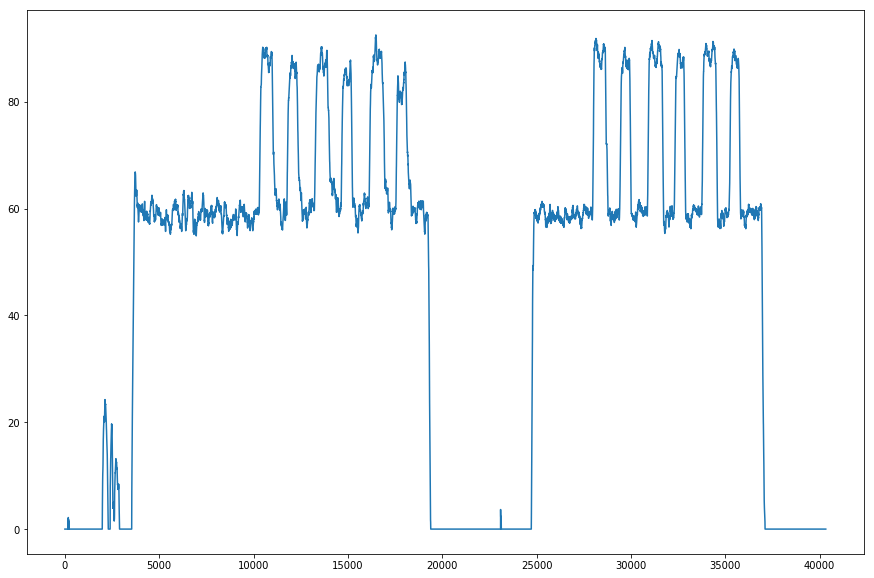

In [173]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
df_m.enhanced_speed.plot()
plt.show()

In [174]:
s = pd.Series(df_m.loc[df_m.enhanced_speed > 40].index.values)
print(s[s < 20000].max(), s[s > 20000].min())

19305 24784


In [176]:
left_1 = s.min()
righ_1 = s[s < 20000].max()
left_2 = s[s > 20000].min()
righ_2 = s.max()
print('Indeces are', str(left_1) + ':' + str(righ_1), 'and', str(left_2) + ':' + str(righ_2))

Indeces are 3624:19305 and 24784:36965


Checking their positions and speed:

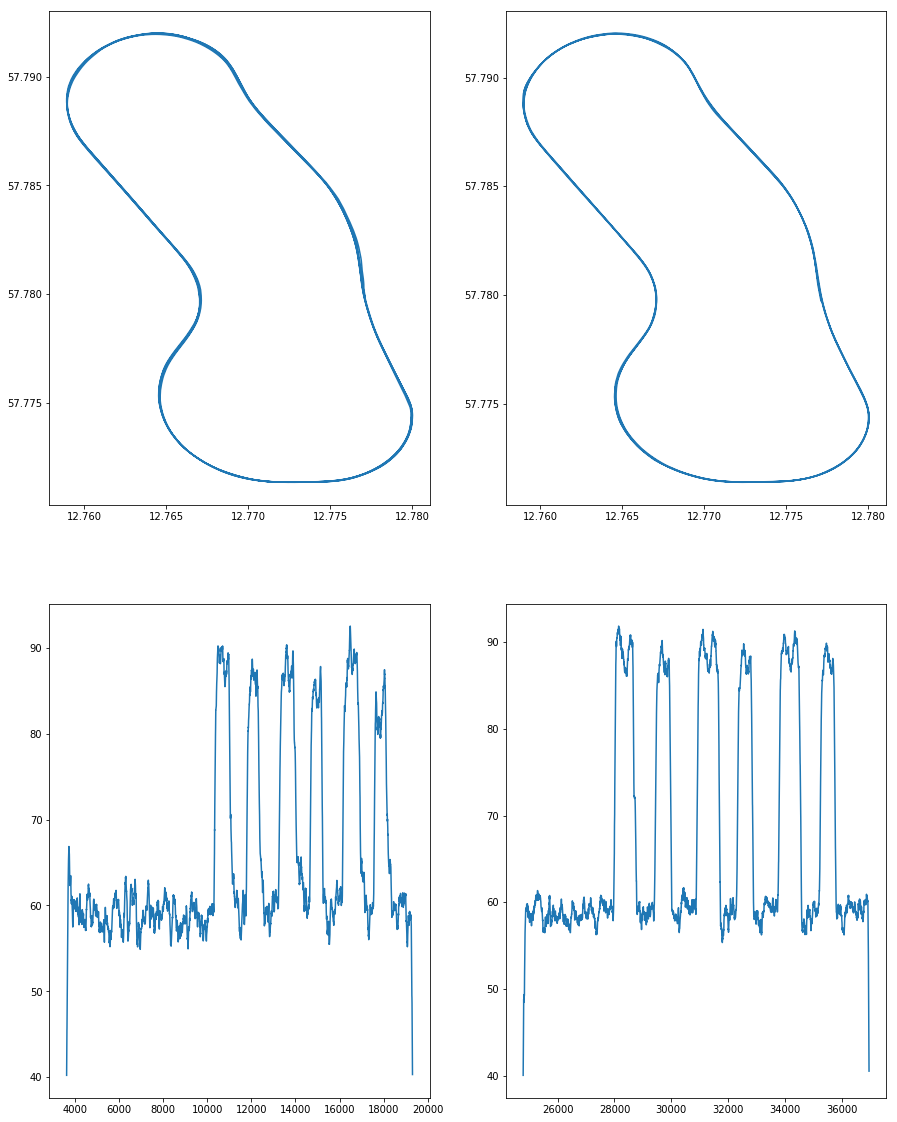

In [177]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(15, 20)
ax[0, 0].plot(df_m.loc[left_1:righ_1, 'position_long'], df_m.loc[left_1:righ_1, 'position_lat'])
ax[0, 1].plot(df_m.loc[left_2:righ_2, 'position_long'], df_m.loc[left_2:righ_2, 'position_lat'])
ax[1, 0].plot(df_m.loc[left_1:righ_1, 'enhanced_speed'])
ax[1, 1].plot(df_m.loc[left_2:righ_2, 'enhanced_speed'])
plt.show()

Approximate time duration:

In [178]:
print('For the first one:')
print(df_m.loc[3624:19305, 'utc_timestamp'].min(), df_m.loc[3624:19305, 'utc_timestamp'].max())
print('Length is {}'.format(time.strftime('%H:%M:%S', time.gmtime(df_m.loc[3624:19305, 'utc_timestamp'].nunique()))))

For the first one:
2019-07-04 11:10:35+00:00 2019-07-04 11:36:43+00:00
Length is 00:26:09


In [179]:
print('For the second one:')
print(df_m.loc[24784:36965, 'utc_timestamp'].min(), df_m.loc[24784:36965, 'utc_timestamp'].max())
print('Length is {}'.format(time.strftime('%H:%M:%S', time.gmtime(df_m.loc[24784:36965, 'utc_timestamp'].nunique()))))

For the second one:
2019-07-04 11:45:51+00:00 2019-07-04 12:06:09+00:00
Length is 00:20:19


Corresponding signals from the D-GPS:

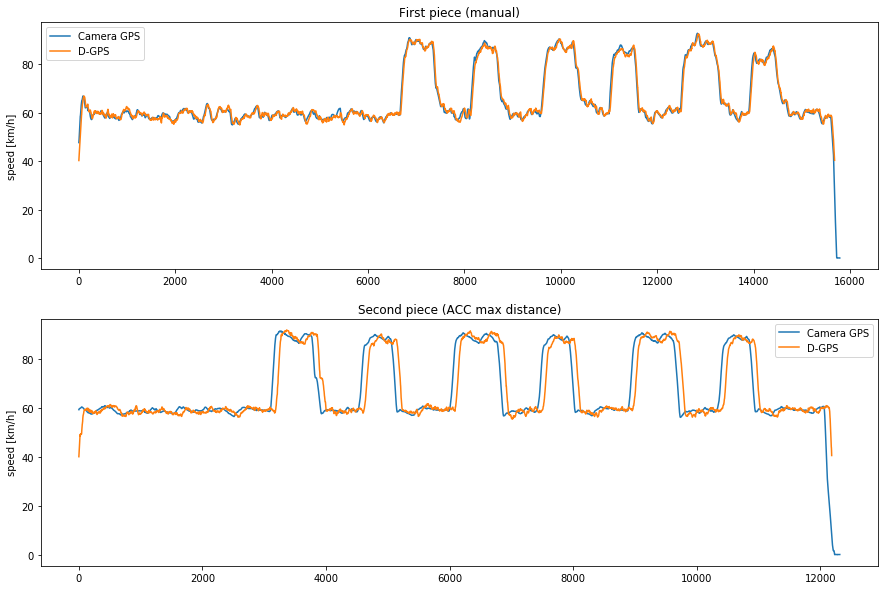

In [190]:
df_1 = pd.read_csv('../data/raw/labeled/Thursday 1st manual.csv')
df_2 = pd.read_csv('../data/raw/labeled/Thursday ACC max dist.csv')

fig, ax = plt.subplots(2, 1)
fig.set_size_inches(15, 10)
ax[0].plot(df_1['Velocity(m/s) Tesla azd'].index, df_1['Velocity(m/s) Tesla azd'] * 3600 / 1000)
ax[0].plot(list(range(righ_1 - left_1 +1)), df_m.loc[left_1:righ_1, 'enhanced_speed'])
ax[0].set_title('First piece (manual)')
ax[0].set_ylabel('speed [km/h]')
ax[0].legend(['Camera GPS', 'D-GPS'])
ax[1].plot(df_2['Velocity(m/s) Tesla azd'].index, df_2['Velocity(m/s) Tesla azd'] * 3600 / 1000)
ax[1].plot(list(range(righ_2 - left_2 +1)), df_m.loc[left_2:righ_2, 'enhanced_speed'])
ax[1].set_title('Second piece (ACC max distance)')
ax[1].set_ylabel('speed [km/h]')
ax[1].legend(['Camera GPS', 'D-GPS'])
plt.show()

## Mercedes `.fit` vs videos

We proceed in a similar way for the Mercedes:

In [168]:
path = '../data/tmp/mercedes/'
files = os.listdir(path)
csv_files = [file for file in files if file[-4:].lower() == '.csv']
for file in csv_files:
    tmp = pd.read_csv(path + file)
    display(tmp.head())
    print(file, '-> shape =', tmp.shape, '\nFrom', tmp.utc_timestamp.min(), 'to', tmp.utc_timestamp.max())
    print('Length is {}'.format(time.strftime('%H:%M:%S', time.gmtime(tmp.utc_timestamp.nunique()))))
    print('------------------------------------------------------------')

,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 12:15:22+00:00,975,57.778994,12.777424,178.8,9.5760,"(-1.18, 2.38, -0.44)"
1,2019-07-04 12:15:22+00:00,75,57.778997,12.777412,178.8,9.0000,"(-1.01, 2.28, -0.44)"
2,2019-07-04 12:15:22+00:00,175,57.778997,12.777405,178.6,8.4924,"(-0.88, 2.18, -0.43)"
3,2019-07-04 12:15:22+00:00,275,57.778999,12.777404,178.8,7.9740,"(-0.78, 2.07, -0.43)"
4,2019-07-04 12:15:22+00:00,375,57.779001,12.777402,178.8,7.6716,"(-0.69, 2.01, -0.43)"


2019-07-04-14-15-16.csv -> shape = (9505, 7) 
From 2019-07-04 12:15:22+00:00 to 2019-07-04 12:31:12+00:00
Length is 00:15:51
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 11:08:05+00:00,556,57.777482,12.779583,204.6,11.0808,"(-1.61, 2.62, 0.2)"
1,2019-07-04 11:08:05+00:00,656,57.777487,12.779580,204.6,11.0484,"(-1.56, 2.64, 0.2)"
2,2019-07-04 11:08:05+00:00,756,57.777492,12.779577,204.6,10.9692,"(-1.47, 2.66, 0.2)"
3,2019-07-04 11:08:05+00:00,856,57.777499,12.779575,204.6,10.9152,"(-1.41, 2.68, 0.2)"
4,2019-07-04 11:08:05+00:00,956,57.777497,12.779571,204.4,10.8828,"(-1.37, 2.68, 0.2)"


2019-07-04-13-08-00.csv -> shape = (21589, 7) 
From 2019-07-04 11:08:05+00:00 to 2019-07-04 11:44:03+00:00
Length is 00:35:59
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity


2019-07-04-13-01-37.csv -> shape = (0, 7) 
From nan to nan
Length is 00:00:00
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 13:58:54+00:00,590,57.778776,12.777524,182.4,0.0,"(0.0, 0.13, 0.0)"
1,2019-07-04 13:58:54+00:00,690,57.778773,12.777521,182.4,0.0,"(0.0, 0.11, 0.0)"
2,2019-07-04 13:58:54+00:00,790,57.778774,12.777515,182.4,0.0,"(0.0, 0.09, 0.0)"
3,2019-07-04 13:58:54+00:00,890,57.778774,12.777511,182.4,0.0,"(0.0, 0.09, 0.0)"
4,2019-07-04 13:58:54+00:00,990,57.778779,12.777508,182.4,0.0,"(0.0, 0.1, 0.0)"


2019-07-04-15-58-49.csv -> shape = (4679, 7) 
From 2019-07-04 13:58:54+00:00 to 2019-07-04 14:06:41+00:00
Length is 00:07:48
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity


2019-07-04-21-24-13.csv -> shape = (0, 7) 
From nan to nan
Length is 00:00:00
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 13:35:03+00:00,240,57.780994,12.776929,181.8,60.7680,"(-1.88, 16.77, 0.32)"
1,2019-07-04 13:35:03+00:00,340,57.781048,12.776945,181.6,61.5996,"(-2.0, 16.99, 0.04)"
2,2019-07-04 13:35:03+00:00,440,57.781051,12.776929,181.6,61.3980,"(-1.99, 16.93, 0.04)"
3,2019-07-04 13:35:03+00:00,540,57.781056,12.776919,181.6,61.6788,"(-1.94, 17.02, 0.05)"
4,2019-07-04 13:35:03+00:00,640,57.781069,12.776913,181.6,61.8948,"(-1.9, 17.08, 0.04)"


2019-07-04-15-34-58.csv -> shape = (12132, 7) 
From 2019-07-04 13:35:03+00:00 to 2019-07-04 13:55:16+00:00
Length is 00:20:14
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity


2019-07-04-07-39-38.csv -> shape = (0, 7) 
From nan to nan
Length is 00:00:00
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 12:51:04+00:00,594,57.778992,12.777449,202.8,0.0,"(-0.27, -0.04, 0.07)"
1,2019-07-04 12:51:04+00:00,694,57.778997,12.777447,203.4,0.0,"(-0.21, -0.03, 0.06)"
2,2019-07-04 12:51:04+00:00,794,57.779001,12.777450,204.2,0.0,"(-0.18, -0.03, 0.05)"
3,2019-07-04 12:51:04+00:00,894,57.779011,12.777449,203.8,0.0,"(-0.14, -0.02, 0.04)"
4,2019-07-04 12:51:04+00:00,994,57.779011,12.777450,204.0,0.0,"(-0.12, -0.02, 0.03)"


2019-07-04-14-50-58.csv -> shape = (9456, 7) 
From 2019-07-04 12:51:04+00:00 to 2019-07-04 13:06:49+00:00
Length is 00:15:46
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 11:00:48+00:00,40,57.776649,12.778317,10.4,3.978,"(-0.16, -1.09, -1.13)"
1,2019-07-04 11:00:48+00:00,140,57.776935,12.778688,88.8,0.000,"(0.0, 0.0, 0.0)"
2,2019-07-04 11:00:48+00:00,240,57.777019,12.778806,111.4,0.000,"(0.0, 0.0, 0.0)"
3,2019-07-04 11:00:48+00:00,340,57.777057,12.778857,121.4,0.000,"(0.0, 0.0, 0.0)"
4,2019-07-04 11:00:48+00:00,440,57.777081,12.778893,128.0,0.000,"(0.0, 0.0, 0.0)"


2019-07-04-13-00-41.csv -> shape = (353, 7) 
From 2019-07-04 11:00:48+00:00 to 2019-07-04 11:01:23+00:00
Length is 00:00:36
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 13:14:38+00:00,195,57.780601,12.777052,165.0,76.0320,"(-0.53, 21.11, 0.04)"
1,2019-07-04 13:14:38+00:00,295,57.780629,12.777048,164.2,77.2488,"(-0.84, 21.44, 0.04)"
2,2019-07-04 13:14:38+00:00,395,57.780632,12.777041,162.8,78.0948,"(-1.07, 21.66, 0.04)"
3,2019-07-04 13:14:38+00:00,495,57.780640,12.777030,162.4,78.7320,"(-1.29, 21.83, 0.04)"
4,2019-07-04 13:14:38+00:00,595,57.780661,12.777023,162.2,79.3908,"(-1.48, 22.0, 0.04)"


2019-07-04-15-14-33.csv -> shape = (9801, 7) 
From 2019-07-04 13:14:38+00:00 to 2019-07-04 13:30:58+00:00
Length is 00:16:21
------------------------------------------------------------


,utc_timestamp,timestamp_ms,position_lat,position_long,enhanced_altitude,enhanced_speed,velocity
0,2019-07-04 11:44:55+00:00,998,57.779030,12.777719,194.6,0.0,"(0.0, 0.19, 0.0)"
1,2019-07-04 11:44:55+00:00,98,57.779031,12.777717,194.6,0.0,"(0.0, 0.17, 0.0)"
2,2019-07-04 11:44:55+00:00,198,57.779034,12.777711,194.6,0.0,"(0.0, 0.15, 0.0)"
3,2019-07-04 11:44:55+00:00,298,57.779038,12.777703,194.6,0.0,"(0.0, 0.08, 0.0)"
4,2019-07-04 11:44:55+00:00,398,57.779044,12.777691,194.6,0.0,"(0.0, 0.01, 0.0)"


2019-07-04-13-44-50.csv -> shape = (13225, 7) 
From 2019-07-04 11:44:55+00:00 to 2019-07-04 12:06:57+00:00
Length is 00:22:03
------------------------------------------------------------


In [37]:
!ls ../data/raw/day\ 4\ b/DCIM/100_VIRB/*.GLV

'../data/raw/day 4 b/DCIM/100_VIRB/V0810084.GLV'
'../data/raw/day 4 b/DCIM/100_VIRB/V0820085.GLV'
'../data/raw/day 4 b/DCIM/100_VIRB/V0830086.GLV'
'../data/raw/day 4 b/DCIM/100_VIRB/V0830087.GLV'
'../data/raw/day 4 b/DCIM/100_VIRB/V0840088.GLV'
'../data/raw/day 4 b/DCIM/100_VIRB/V0850089.GLV'
'../data/raw/day 4 b/DCIM/100_VIRB/V0860090.GLV'
'../data/raw/day 4 b/DCIM/100_VIRB/V0870091.GLV'
'../data/raw/day 4 b/DCIM/100_VIRB/V0880092.GLV'
'../data/raw/day 4 b/DCIM/100_VIRB/V0890093.GLV'


```
                 video                            duration                   CSV file                  comments
                
'../data/raw/day 4 b/DCIM/100_VIRB/V0810084.GLV' -> 00:03 <- ../data/tmp/mercedes/?                   bad video
'../data/raw/day 4 b/DCIM/100_VIRB/V0820085.GLV' -> 00:00 <- ../data/tmp/mercedes/?                   bad video
'../data/raw/day 4 b/DCIM/100_VIRB/V0830086.GLV' -> 30:00 <- ../data/tmp/mercedes/2019-07-04-13-08-00.csv first
'../data/raw/day 4 b/DCIM/100_VIRB/V0830087.GLV' -> 05:58 <- ../data/tmp/mercedes/2019-07-04-13-08-00.csv  last
'../data/raw/day 4 b/DCIM/100_VIRB/V0840088.GLV' -> 22:01 <- ../data/tmp/mercedes/2019-07-04-13-44-50.csv
'../data/raw/day 4 b/DCIM/100_VIRB/V0850089.GLV' -> 15:50 <- ../data/tmp/mercedes/2019-07-04-14-15-16.csv
'../data/raw/day 4 b/DCIM/100_VIRB/V0860090.GLV' -> 15:45 <- ../data/tmp/mercedes/2019-07-04-14-50-58.csv
'../data/raw/day 4 b/DCIM/100_VIRB/V0870091.GLV' -> 16:19 <- ../data/tmp/mercedes/2019-07-04-15-14-33.csv
'../data/raw/day 4 b/DCIM/100_VIRB/V0880092.GLV' -> 20:12 <- ../data/tmp/mercedes/2019-07-04-15-34-58.csv
'../data/raw/day 4 b/DCIM/100_VIRB/V0890093.GLV' -> 07:47 <- ../data/tmp/mercedes/2019-07-04-15-58-49.csv
```

First thing that we notice is that three `.csv` files are empty:
- `2019-07-04-13-01-37.csv`
- `2019-07-04-21-24-13.csv`
- `2019-07-04-07-39-38.csv`

Also, one `.fit` file is not used:
- `2019-07-04-13-00-41.csv`: ~36s long.

In [169]:
# Total duration usable video:
time.strftime('%H:%M:%S', time.gmtime(30 * 60 +  0 + \
                                       5 * 60 + 58 + \
                                      22 * 60 +  1 + \
                                      15 * 60 + 50 + \
                                      15 * 60 + 45 + \
                                      16 * 60 + 19 + \
                                      20 * 60 + 12 + \
                                       7 * 60 + 47))

'02:13:52'

So adding up the usable video of the Tesla and the Mercedes:

In [171]:
print((2 + 1) * 3600 + (13 + 7) * 60 + 52 + 54, 'seconds in total')

12106 seconds in total
